# 1.Download Datasete on Kaggle

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maryamom123","key":"6fce7b555cc605c3390dc8dcec541300"}'}

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download maryamom123/datasetflower

 98% 84.0M/85.8M [00:05<00:00, 20.8MB/s]
100% 85.8M/85.8M [00:05<00:00, 15.8MB/s]


In [5]:
!unzip /content/datasetflower.zip

Archive:  /content/datasetflower.zip
  inflating: dataset/cat_to_name.json  
  inflating: dataset/test/image_00005.jpg  
  inflating: dataset/test/image_00006.jpg  
  inflating: dataset/test/image_00024.jpg  
  inflating: dataset/test/image_00025.jpg  
  inflating: dataset/test/image_00029.jpg  
  inflating: dataset/test/image_00050.jpg  
  inflating: dataset/test/image_00060.jpg  
  inflating: dataset/test/image_00065.jpg  
  inflating: dataset/test/image_00092.jpg  
  inflating: dataset/test/image_00099.jpg  
  inflating: dataset/test/image_00114.jpg  
  inflating: dataset/test/image_00116.jpg  
  inflating: dataset/test/image_00132.jpg  
  inflating: dataset/test/image_00176.jpg  
  inflating: dataset/test/image_00177.jpg  
  inflating: dataset/test/image_00187.jpg  
  inflating: dataset/test/image_00191.jpg  
  inflating: dataset/test/image_00202.jpg  
  inflating: dataset/test/image_00203.jpg  
  inflating: dataset/test/image_00204.jpg  
  inflating: dataset/test/image_00212.jpg  

In [6]:
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from skimage.io import imread
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from skimage.color import rgb2gray, rgba2rgb
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
import datetime
import time
import random
import os
import cv2

%reload_ext tensorboard

# Preparing & Preprocessing Images

In [7]:
dataset_dir = '/content/dataset'

folderMap = {
    0: 'bird of paradise', 1: 'colts foot', 2: 'purple coneflower', 3: 'peruvian lily', 4: 'fritillary', 5: 'stemless gentian', 6:'artichoke', 7: 'sweet william', 8: 'cape flower', 
    9: 'barbeton daisy', 10: 'poinsettia', 11: 'common dandelion', 12: 'wild pansy', 13: 'pelargonium', 14: 'bishop of llandaff'}

In [8]:
valid = os.path.join(dataset_dir, 'valid')
Train = os.path.join(dataset_dir, 'train')

In [9]:
num_classes = len(os.listdir(Train))
num_classes

15

In [10]:
images = []
labels = []
labels_idx = []

for label in os.listdir(Train):
    images_for_label = os.path.join(Train, label)
    for image in os.listdir(images_for_label):
        image = plt.imread(os.path.join(images_for_label, image))
        image = cv2.resize(image, (32, 32))
        images.append(image)
        labels.append(folderMap[int(label)])
        labels_idx.append(label)

In [11]:
images = np.array(images)
labels = np.array(labels)
labels_idx = np.array(labels_idx, dtype='int32')

images.shape

(1068, 32, 32, 3)

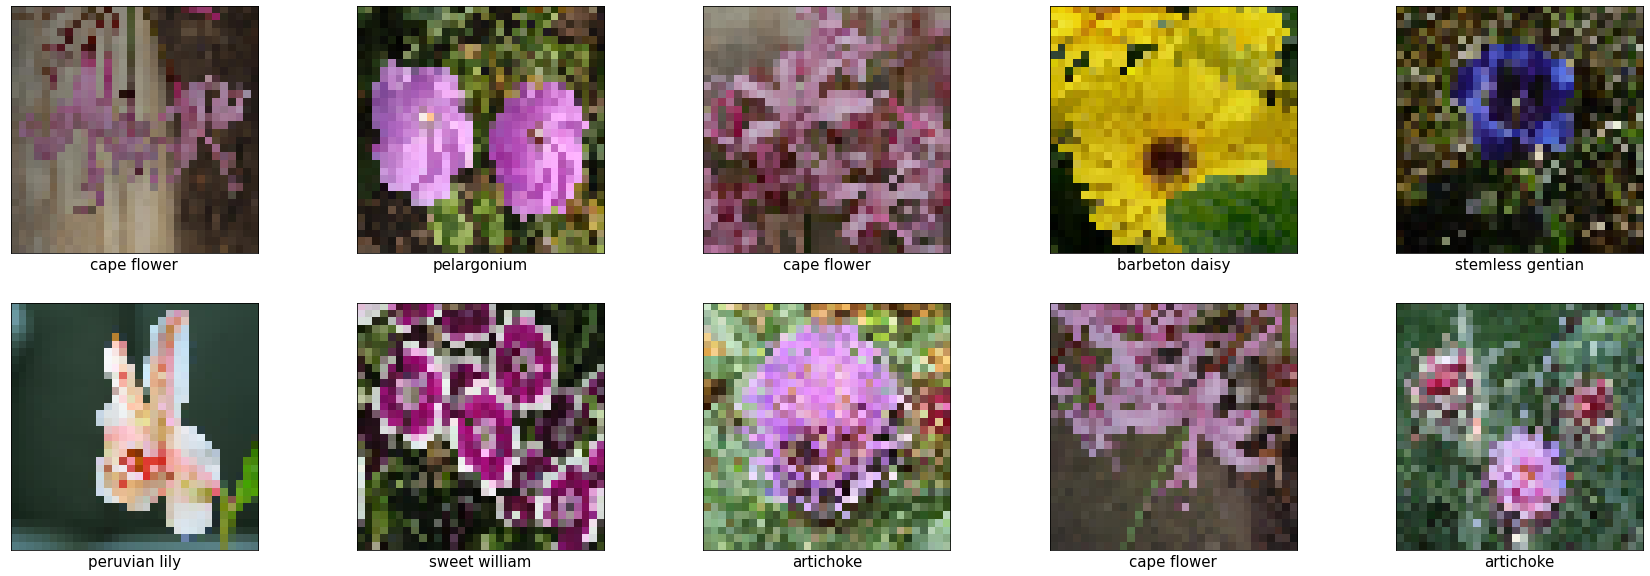

In [12]:
fig = plt.figure(figsize=(30, 10))
for i in range(10):
    random_num = np.random.randint(0, 1068)
    ax = fig.add_subplot(2, 5, i+1)
    plt.axis()
    plt.xticks([])
    plt.yticks([])
    ax.set_xlabel(xlabel = labels[random_num], fontsize=15)
    ax.imshow(images[random_num])

In [ ]:
import json
with open('/content/dataset/cat_to_name.json') as f:
    cat_to_name = json.load(f)
    print(json.dumps(cat_to_name, indent=4))

# class_names are inferred labels from folder names of type string (e.g. '0')
# the internal integer label values are different from the values in the JSON
# so these functions are necessary

# convert internal tag integer to readable flower name
def flower_name(val):
    return cat_to_name[train_ds.class_names[val]]

# convert label from CSV to internal label value
def to_internal_tag(name_tag):
    return train_ds.class_names.index(str(name_tag))

# Splitting Sataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_idx, random_state=1, stratify=labels_idx, shuffle=True,test_size=0.1)

In [14]:
print("Training: ", len(X_train))
print("Test: ", len(X_test))

Training:  961
Test:  107


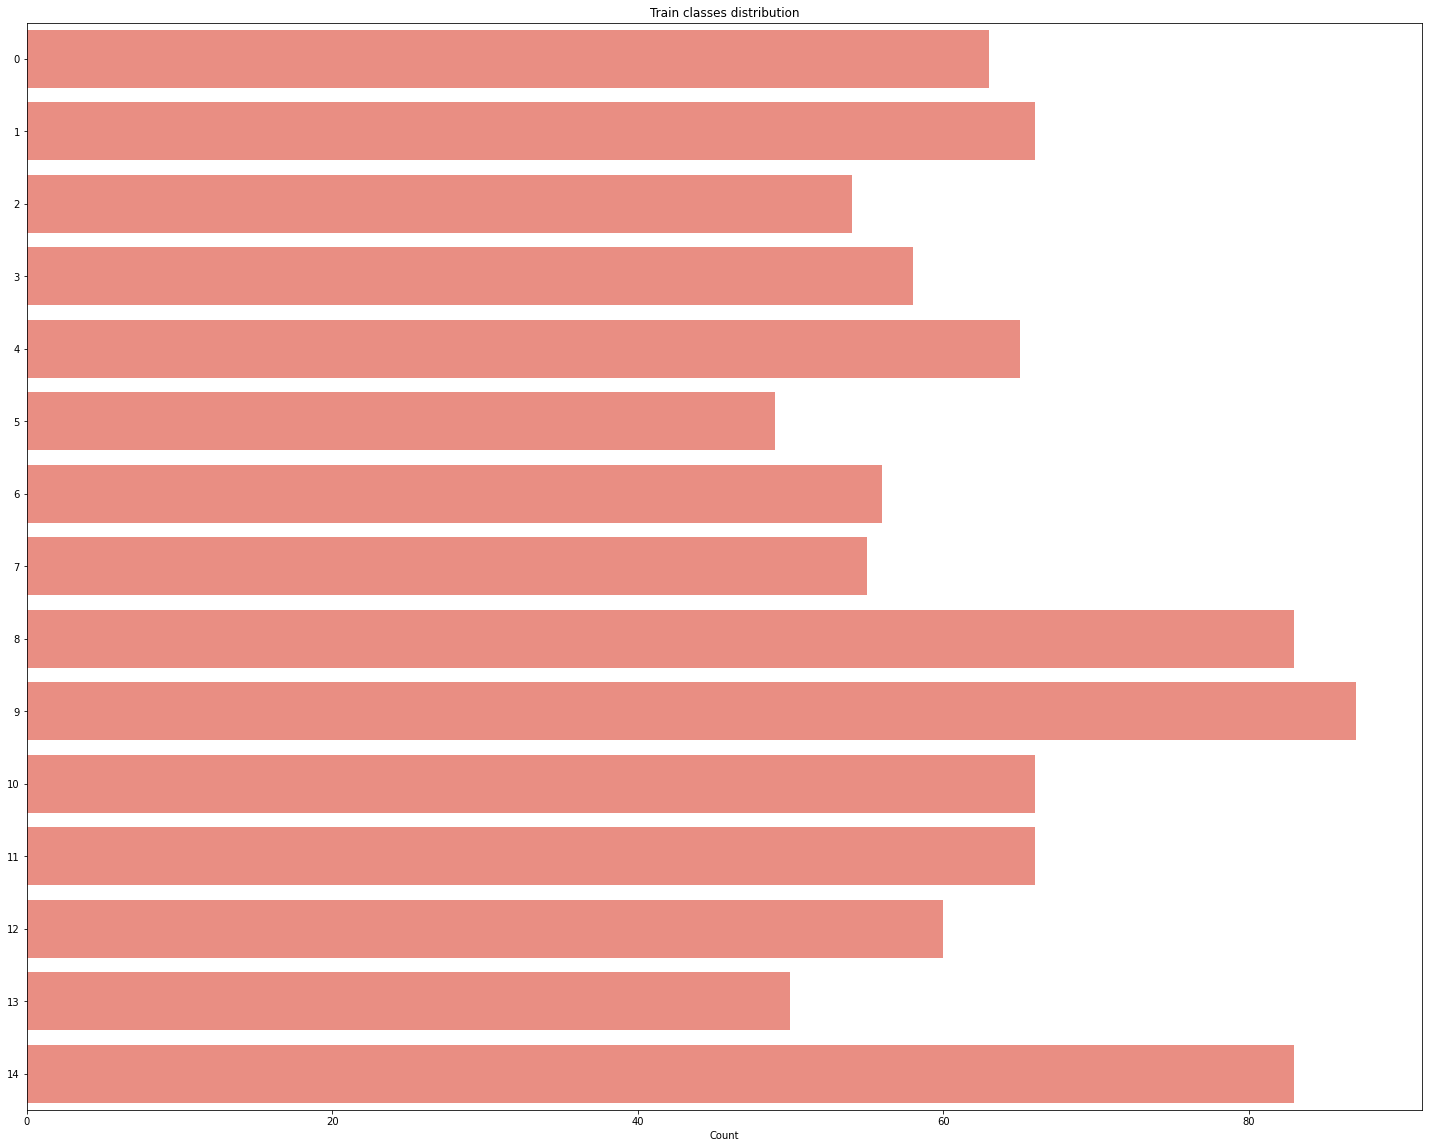

In [15]:
plt.figure(figsize=(25, 20))
plt.title('Train classes distribution')

sns.countplot(y=y_train, color="salmon")
plt.xlabel('Count')
plt.show()

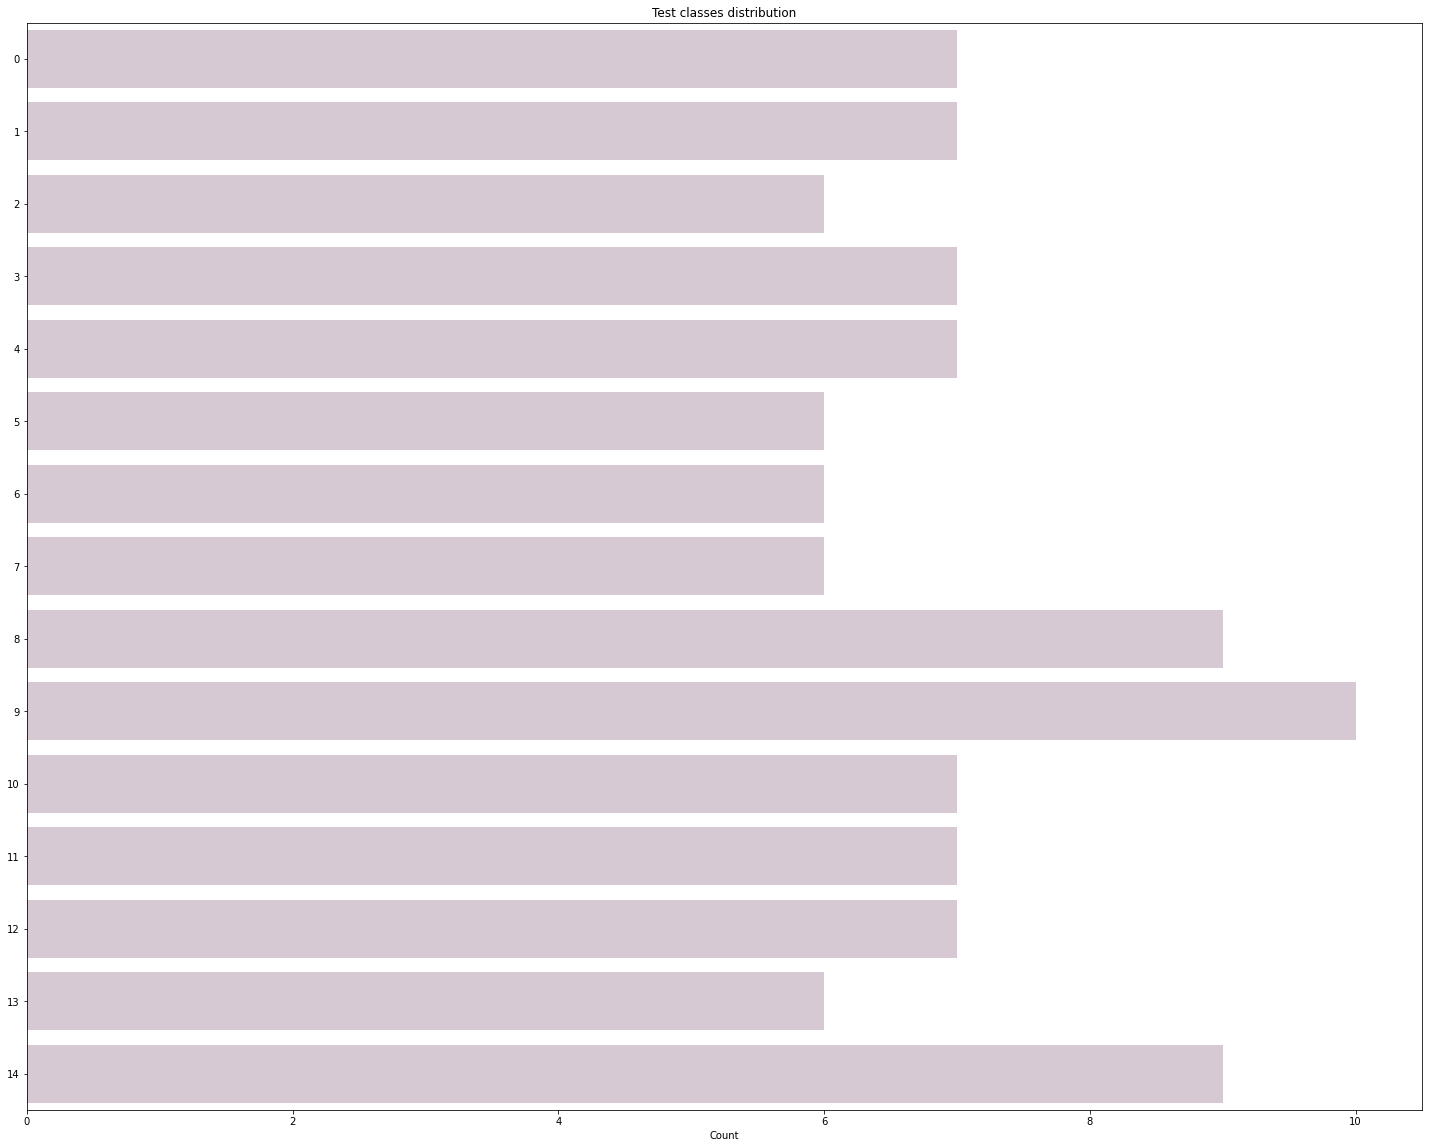

In [16]:
plt.figure(figsize=(25, 20))
plt.title('Test classes distribution')

sns.countplot(y=y_test, color='#D9C7D4')
plt.xlabel('Count')
plt.show()

# Building the model

In [18]:
from sklearn.svm import SVC
import pickle
from sklearn.metrics import accuracy_score

In [19]:
# Reshapping Data
nsamples=961
nx=32
ny=32
f=3
# Training
nsamples, nx, ny,f = X_train.shape
dx_train_dataset = X_train.reshape((nsamples,nx*ny,f))
dx_train_dataset = X_train.reshape((nsamples,nx*ny*f))
# Testing
nsamples, nx, ny,f = X_test.shape
dx_test_dataset = X_test.reshape((nsamples,nx*ny,f))
dx_test_dataset = X_test.reshape((nsamples,nx*ny*f))

In [20]:
# Training The Model Using SVM
model = SVC(kernel='linear')
model.fit(dx_train_dataset, y_train)
pick = open('medol.sav','wb')
pickle.dump(model, pick)
pick = open('medol.sav','rb')
model = pickle.load(pick)
pick.close()

In [ ]:
# Accuracy Score of Training Data
accuracy = model.score(dx_train_dataset,y_train)
print("Training Accuracy -> ", accuracy*100)

Training Accuracy ->  100.0


In [ ]:
# Accuracy Score of Testing Data
accuracy = model.score(dx_test_dataset,y_test)
print("Testing  Accuracy -> ", accuracy*100)

Testing  Accuracy ->  64.48598130841121


In [21]:
y_pred = model.predict(dx_train_dataset)

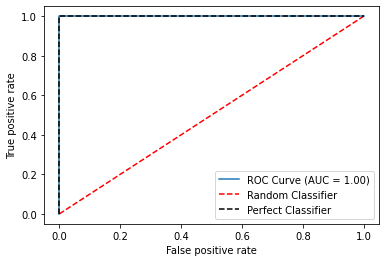

In [30]:
from sklearn.metrics import roc_curve,auc
fpr_sum = np.zeros(3)
tpr_sum = np.zeros(3)
for class_num in range(15):
  predications = []
  true_labels = []
  for i in range(y_pred .shape[0]):
    if(y_pred [i] == class_num):
      predications.append(1)
    else:
      predications.append(0)

    if(y_pred [i] == class_num):
      true_labels.append(1)
    else:
      true_labels.append(0)

  predications = np.array(predications)
  true_labels = np.array(true_labels)
  fpr,tpr,_ = roc_curve(true_labels,predications)
  fpr_sum += fpr
  tpr_sum += tpr


fpr = fpr_sum / 15
tpr = tpr_sum / 15

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='black', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
img_name = random.choice(os.listdir('/content/dataset/valid'))
img_path = '/content/dataset/valid/29/image_04103.jpg'

img = tf.keras.utils.load_img(
    img_path, target_size=(32, 32)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "{} most likely belongs to {} with a {:.2f} percent confidence."
    .format(img_name, flower_name(np.argmax(score)), 100 * np.max(score))
)

plt.figure(figsize=(2, 2))
plt.imshow((img_array[0].numpy()).astype('uint8'))
plt.title("{}:{:.2f}".format(flower_name(np.argmax(score)), 100 * np.max(score)))
plt.axis('off')